Netflix data analytics using python

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
filepath = "/content/sample_data/netflix1.csv"
df = pd.read_csv(filepath)



In [79]:
df.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1248,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,France,2/10/2021,2021,TV-MA,99 min,"Comedies, International Movies"
1859,s2270,Movie,Budhia Singh: Born to Run,Soumendra Padhi,India,7/5/2020,2016,TV-MA,95 min,"Dramas, Independent Movies, International Movies"
882,s810,Movie,Starsky & Hutch,Todd Phillips,United States,6/2/2021,2004,PG-13,101 min,"Action & Adventure, Comedies"
4327,s6044,Movie,A Leaf of Faith,Chris Bell,United States,8/27/2018,2018,TV-MA,87 min,Documentaries
1134,s1165,Movie,Ni de coña,Fernando Ayllón,Spain,3/26/2021,2020,TV-MA,97 min,"Comedies, International Movies"
2624,s3430,Movie,Fractured,Brad Anderson,United States,10/11/2019,2019,TV-MA,100 min,Thrillers
7693,s3822,TV Show,Dennis and Gnasher Unleashed,Not Given,United Kingdom,5/15/2019,2017,TV-Y,1 Season,"British TV Shows, Kids' TV, TV Comedies"
6020,s8186,Movie,The Aerial,Esteban Sapir,Argentina,4/1/2018,2007,TV-MA,99 min,"Dramas, International Movies, Sci-Fi & Fantasy"
2392,s3047,Movie,All the Freckles in the World,Yibrán Asuad,Mexico,1/3/2020,2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies"
6083,s8260,Movie,The Crow,Alex Proyas,United States,1/1/2019,1994,R,102 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy"


In [80]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [81]:
df.tail()



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [83]:
df['director'] = df['director'].replace('Not Given', np.nan)
df['country'] = df['country'].replace('Not Given', np.nan)

print("Missing values after replacing 'Not Given':")
print(df[['director', 'country']].isnull().sum())




Missing values after replacing 'Not Given':
director    2588
country      287
dtype: int64


In [84]:
def missng_director():
  missing_director_count = df['director'].isnull().sum()
  percentage = (missing_director_count / rows) * 100
  return percentage

print (f"Percentage of missing directors: {missng_director():.2f}%")

Percentage of missing directors: 29.44%


29% of the movies have missing directors, we can not drop the rows of missing directors as will will lose 29% of the dataset 

In [85]:
def missng_country():
  missing_country_count = df['country'].isnull().sum()
  percentage = (missing_country_count / rows) * 100
  return percentage

print (f"Percentage of missing Countries: {missng_country():.2f}%")

Percentage of missing Countries: 3.27%


3.27% approximatley 3% of the country column has missing infomation, county of origin of the movie is not given, we can drop rows where the counry is not given. 

In [86]:
null_both_df = df[df['country'].isnull() & df['director'].isnull()]
print(f"Number of rows where both 'country' and 'director' are null: {len(null_both_df)}")
display(null_both_df.head())

Number of rows where both 'country' and 'director' are null: 0


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [87]:
df.dropna(subset=['country'], inplace=True)
print("Missing values in 'country' after dropping:")
print(df['country'].isnull().sum())

Missing values in 'country' after dropping:
0


In [88]:
# Fill missing 'director' values with 'Unknown Director'
df['director'].fillna('Unknown Director', inplace=True)

print("Missing values after handling 'director':")
print(df[['director', 'country']].isnull().sum())

Missing values after handling 'director':
director    0
country     0
dtype: int64


In [89]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [90]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [91]:

#This shows the shape of the data set, number of rows and number of coumns(rows, columns)
df.shape

(8503, 10)

In [92]:
df.describe()

,release_year
count,8503.000000
mean,2014.088792
std,8.834757
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Since the data set has no missing valies we can not drop or fill in the missing vales

In [93]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8785,False
8786,False
8787,False
8788,False


In [94]:
df['type'].value_counts()

,count
type,
Movie,5869
TV Show,2634


In [95]:
df.value_counts("listed_in")

,count
listed_in,
Documentaries,350
"Dramas, International Movies",347
Stand-Up Comedy,321
"Comedies, Dramas, International Movies",265
"Dramas, Independent Movies, International Movies",245
...,...
"TV Comedies, TV Mysteries",1
"TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows",1
"TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers",1


In [96]:
df.drop(["show_id"], axis=1 ,inplace=True)

In [97]:
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [98]:
df.rename(columns={"listed_in":"genre"}, inplace=True)

In [99]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [100]:
df.to_csv("netflix_cleaned.csv", index=False)

 Exploratory Data Analysis (EDA)

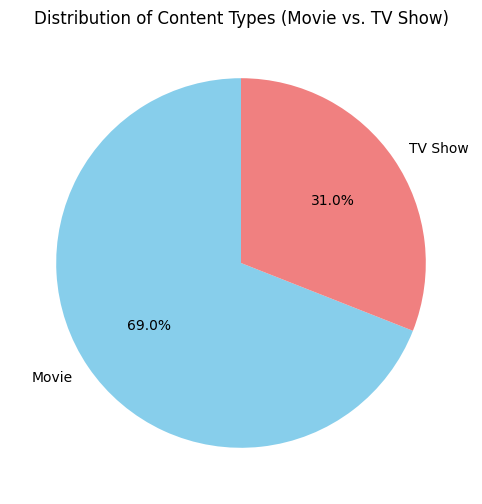

In [101]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Content Types (Movie vs. TV Show)')
plt.ylabel('') # Hide the default 'y' label from pandas series plot
plt.show()